# Load all files

In [2]:
import os
import re
import csv

import pandas
import matplotlib.pyplot as plt

In [63]:
min_max_sum_colors = {}
min_colors = {}
min_colors["newground"] = "#FF0080"
min_colors["idlv"] = "#FF8000"
min_colors["gringo"] = "#FF0000"

max_colors = {}
max_colors["newground"] = "#0080FF"
max_colors["idlv"] = "#8000FF"
max_colors["gringo"] = "#0000FF"

sum_colors = {}
sum_colors["newground"] = "#01FF00"
sum_colors["idlv"] = "#00FFFE"
sum_colors["gringo"] = "#D9FF06"

min_max_sum_colors["min"] = min_colors
min_max_sum_colors["max"] = max_colors
min_max_sum_colors["sum"] = sum_colors


In [3]:
color_gringo = "#00ddff"
color_idlv = "#0060FF"
color_no_body = "#FFA69E"
color_rewrite = "#AA4465"
color_replace = "#462255"

In [4]:
rootdir = "./"

In [5]:
problem_dir = {}

In [11]:
problems = ["count","max","min","sum"]
sub_problems = ["light-head-3","light-head-9","heavy-head-3","heavy-head-9"]
strategies = ["no-body","rewrite","replace"]

In [12]:
for problem in problems:
    problem_dir[problem] = {}
    problem_dir[problem]["regex"] = regex = re.compile(f'.*{problem}.*')
    problem_dir[problem]["sub_problems"] = {}
    for sub_problem in sub_problems:
        sub_problem_dir = {}
        sub_problem_dir["regex"] = re.compile(f'.*{sub_problem}.*')
        sub_problem_dir["strategies"] = {}
        
        problem_dir[problem]["sub_problems"][sub_problem] = sub_problem_dir
        
        
        for strategy in strategies:
            strategy_dir = {}
            strategy_dir = {}
            strategy_dir["regex"] = re.compile(f'.*{strategy}.*')
            strategy_dir["file_names"] = []
            
            problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy] = strategy_dir
            

In [13]:

for root, dirs, files in os.walk(rootdir):
    for file in files:
        for problem in problems:
            if problem in str(file):
                for sub_problem in sub_problems:
                    if sub_problem in str(file):
                        for strategy in strategies:
                            if strategy in str(file):
                                print(f">>{problem}>>{sub_problem}>>{strategy}")
                                print(file)
                                
                                problem_dir[problem]["sub_problems"][sub_problem]["strategies"][strategy]["file_names"].append(str(file))
                                
        



>>sum>>light-head-3>>replace
21-sum-replace-clique-light-head-3_grounding_size.csv
>>min>>heavy-head-9>>no-body
20-min-no-body-clique-heavy-head-9_grounding_size.csv
>>min>>heavy-head-3>>no-body
19-min-no-body-clique-heavy-head-3_grounding_time.csv
>>count>>heavy-head-3>>replace
11-count-replace-clique-heavy-head-3_total_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_grounding_time.csv
>>max>>heavy-head-9>>no-body
16-max-no-body-clique-heavy-head-9_total_time.csv
>>max>>heavy-head-3>>no-body
15-max-no-body-clique-heavy-head-3_grounding_size.csv
>>sum>>light-head-3>>replace
21-sum-replace-clique-light-head-3_total_time.csv
>>count>>heavy-head-3>>no-body
03-count-no-body-clique-heavy-head-3_grounding_time.csv
>>count>>light-head-9>>rewrite
06-count-rewrite-light-head-9_total_time.csv
>>count>>light-head-9>>replace
10-count-replace-light-head-9_grounding_size.csv
>>count>>light-head-3>>rewrite
05-count-rewrite-clique-light-head-3_grounding_time.csv
>>count>>heavy

In [14]:
problem_dir["sum"]

{'regex': re.compile(r'.*sum.*', re.UNICODE),
 'sub_problems': {'light-head-3': {'regex': re.compile(r'.*light-head-3.*',
   re.UNICODE),
   'strategies': {'no-body': {'regex': re.compile(r'.*no-body.*', re.UNICODE),
     'file_names': []},
    'rewrite': {'regex': re.compile(r'.*rewrite.*', re.UNICODE),
     'file_names': []},
    'replace': {'regex': re.compile(r'.*replace.*', re.UNICODE),
     'file_names': ['21-sum-replace-clique-light-head-3_grounding_size.csv',
      '21-sum-replace-clique-light-head-3_total_time.csv',
      '21-sum-replace-clique-light-head-3_grounding_time.csv']}}},
  'light-head-9': {'regex': re.compile(r'.*light-head-9.*', re.UNICODE),
   'strategies': {'no-body': {'regex': re.compile(r'.*no-body.*', re.UNICODE),
     'file_names': []},
    'rewrite': {'regex': re.compile(r'.*rewrite.*', re.UNICODE),
     'file_names': []},
    'replace': {'regex': re.compile(r'.*replace.*', re.UNICODE),
     'file_names': ['22-sum-replace-clique-light-head-9_total_time.csv',

# Final plotting code

In [76]:

def plotting_code(files, title_prefix, image_prefix, y_axis_label, mode = 0):
    ds = []

    data_frame_strategy = None
    data_frame = None
    
    max_size_val = 0
    
    for strategy, file in files:
        data = pandas.read_csv(file, delimiter=',')
        for col in data.columns:
            if str(col) == "newground-size":
                for item in list(data["newground-size"]):
                    if float(item) > max_size_val:
                        max_size_val = float(item)
            if str(col) == "gringo-size":
                for item in list(data["gringo-size"]):
                    if float(item) > max_size_val:
                        max_size_val = float(item)
            if str(col) == "idlv-size":
                for item in list(data["idlv-size"]):
                    if float(item) > max_size_val:
                        max_size_val = float(item)  
    
    for strategy, file in files:
        data = pandas.read_csv(file, delimiter=',')
        
        strategy = strategy.replace("-","_")

        rename_dir = {}
        for col in data.columns:
            if str(col) == "newground-duration":
                if mode == 0:
                    rename_dir[col] = f"{strategy.replace('-','_')}"
                elif mode == 1:    
                    rename_dir[col] = f"{strategy.replace('-','_')}_newground"
                                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
            if str(col) == "newground-timeout-occured":
                rename_dir[col] = f"{strategy.replace('-','_')}_timeout_occured"
                
            if str(col) == "gringo-duration":
                if mode == 0:
                    rename_dir[col] = f"gringo"
                elif mode == 1:
                    rename_dir[col] = f"{strategy}_gringo"
                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
                        
            if str(col) == "gringo-timeout-occured":
                rename_dir[col] = f"{strategy.replace('-','_')}_{col.replace('-','_')}"
                
            if str(col) == "idlv-timeout-occured":
                rename_dir[col] = f"{strategy.replace('-','_')}_{col.replace('-','_')}"     
                                    
            if str(col) == "idlv-duration":
                if mode == 0:
                    rename_dir[col] = f"idlv"
                elif mode == 1:
                    rename_dir[col] = f"{strategy}_idlv"
                
                for instance in data.instance:
                    cur_time = data.loc[data.instance == instance, col]
                    if int(cur_time) > 1800:
                        data.loc[data.instance == instance, col] = 1800 
                
            if str(col) == "newground-size":
                if mode == 0:
                    rename_dir[col] = f"{strategy.replace('-','_')}"
                elif mode == 1:
                    rename_dir[col] = f"{strategy.replace('-','_')}_newground"              

                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "newground-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_size_val

            if str(col) == "gringo-size":
                if mode == 0:
                    rename_dir[col] = f"gringo"
                elif mode == 1:
                    rename_dir[col] = f"{strategy}_gringo"
                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "gringo-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_size_val               
                
            if str(col) == "idlv-size":
                if mode == 0:
                    rename_dir[col] = f"idlv"
                elif mode == 1:
                    rename_dir[col] = f"{strategy}_idlv"                

                
                for instance in data.instance:
                    timeout_occured = ((list(data.loc[data.instance == instance, "idlv-timeout-occured"]))[0])

                    #timeout_occured = bool(str(data.loc[data.instance == instance, "newground-timeout-occured"]))
                    if timeout_occured == True:
                        data.loc[data.instance == instance, col] = max_size_val

        data.rename(columns = rename_dir, inplace = True)

        if mode == 0:
            if data_frame is None:
                data_frame_strategy = strategy
                data_frame = pandas.DataFrame(data)
            else:
                data_frame[strategy] = data[strategy]
                data_frame[f"{strategy}_timeout_occured"] = data[f"{strategy}_timeout_occured"]
        elif mode == 1:
            if data_frame is None:
                data_frame = pandas.DataFrame(data)
            else:
                for col in data.columns:
                    if col == "instance":
                        next
                        
                    data_frame[col] = data[col]
                
            
    for instance in data_frame.instance:
        if instance and str(instance) != "nan":
            data_frame.loc[data_frame.instance == instance, 'instance'] = int((str(instance).split("_"))[1].split(".")[0])

    x = list(data_frame.instance)
    
    y = {}
    
    if mode == 0:
        gringo = {}
        gringo["data"] = list(data_frame.gringo)
        gringo["label"] = "gringo"
        gringo["color"] = color_gringo
        y["gringo"] = gringo
        
        idlv = {}
        idlv["data"] = list(data_frame.idlv)
        idlv["label"] = "idlv"
        idlv["color"] = color_idlv
        y["idlv"] = idlv
        
        no_body = {}
        no_body["data"] = list(data_frame.no_body)
        no_body["label"] = "no_body"
        no_body["color"] = color_no_body
        y["no_body"] = no_body
        
        rewrite = {}
        rewrite["data"] = list(data_frame.rewrite)
        rewrite["label"] = "rewrite"
        rewrite["color"] = color_rewrite
        y["rewrite"] = rewrite
        
        replace = {}
        replace["data"] = list(data_frame["replace"])
        replace["label"] = "replace"
        replace["color"] = color_replace
        y["replace"] = replace

        if max(x) > 400:
            min_over_400 = 0

            for cur_x in x:
                if cur_x > 400:
                    min_over_400 = cur_x
                    break     

            end_index = x.index(cur_x)

            x = x[:end_index]

            for y_key in y.keys():
                y[y_key]["data"] = y[y_key]["data"][:end_index]
            
    elif mode == 1:
        for cur_problem in ["min","max","sum"]:
            gringo = {}
            gringo["data"] = list(data_frame[f"{cur_problem}_gringo"])
            gringo["label"] = f"{cur_problem}-gringo"
            gringo["color"] = min_max_sum_colors[cur_problem]["gringo"]
            y[f"{cur_problem}-gringo"] = gringo

            idlv = {}
            idlv["data"] = list(data_frame[f"{cur_problem}_idlv"])
            idlv["label"] = f"{cur_problem}-idlv"
            idlv["color"] = min_max_sum_colors[cur_problem]["idlv"]
            y[f"{cur_problem}-idlv"] = idlv

            newground = {}
            newground["data"] = list(data_frame[f"{cur_problem}_newground"])
            newground["label"] = f"{cur_problem}-newground"
            newground["color"] = min_max_sum_colors[cur_problem]["newground"]
            y[f"{cur_problem}-newground"] = newground
        
        # TODO -> REMOVE!
        if max(x) > 400:
            min_over_400 = 0

            for cur_x in x:
                if cur_x > 400:
                    min_over_400 = cur_x
                    break     

            end_index = x.index(cur_x)

            x = x[:end_index]

            for y_key in y.keys():
                y[y_key]["data"] = y[y_key]["data"][:end_index]

    fig, ax = plt.subplots()

    for y_key in y.keys():
        ax.plot(x, y[y_key]["data"], label = y[y_key]["label"], color = y[y_key]["color"])
        
    ax.set_xlabel("Instance Size")
    ax.set_ylabel(y_axis_label)
    ax.legend()
    
    sub_problem_resolver = {}
    sub_problem_resolver["light-head-3"] = "ALPC3"
    sub_problem_resolver["light-head-9"] = "ALL9"
    sub_problem_resolver["heavy-head-3"] = "AHPC3"
    sub_problem_resolver["heavy-head-9"] = "AHL9"
    
    if mode == 0:
        ax.set_title(f"{sub_problem_resolver[sub_problem]} - {problem.upper()} - {title_prefix}  ")
        fig.savefig(f"images/{image_prefix}_{problem}_{sub_problem_resolver[sub_problem]}.png", dpi=500)
    elif mode == 1:
        ax.set_title(f"{sub_problem_resolver[sub_problem]} - MIN/MAX/SUM - {title_prefix}  ")
        fig.savefig(f"images/{image_prefix}_MIN_MAX_SUM_{sub_problem_resolver[sub_problem]}.png", dpi=500)

        
    plt.show()

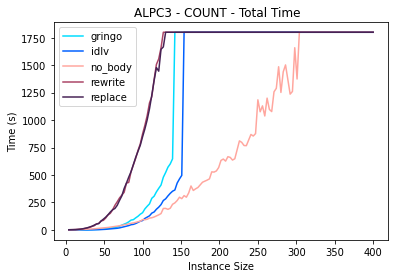

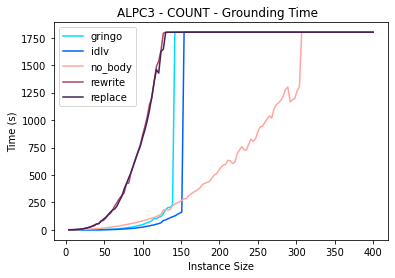

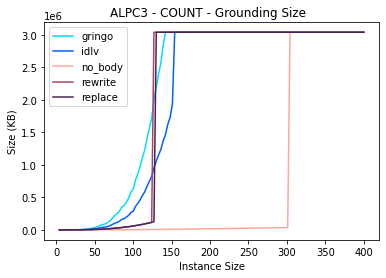

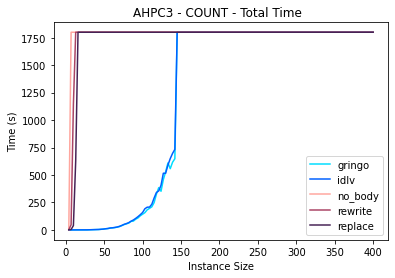

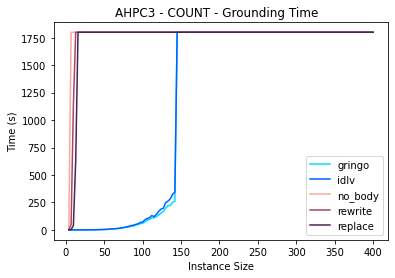

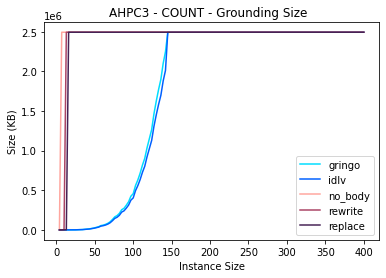

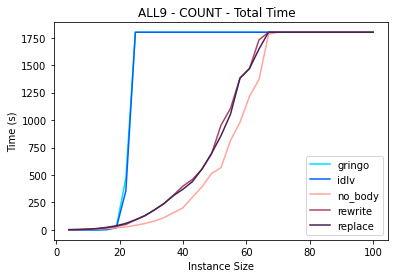

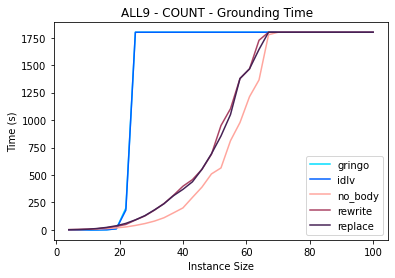

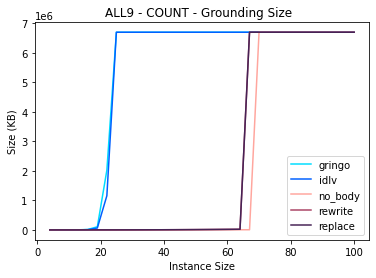

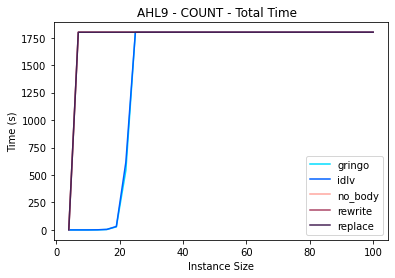

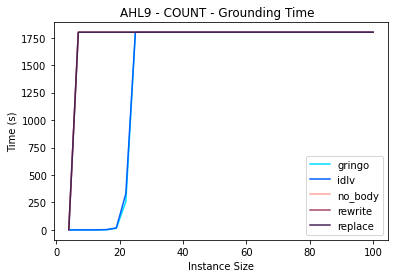

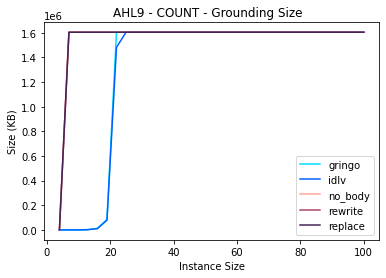

In [68]:
# COUNT
problem = "count"
cur_sub_problems = ["light-head-3","heavy-head-3","light-head-9","heavy-head-9"]

for sub_problem in cur_sub_problems:
    dir_ = problem_dir[problem]["sub_problems"][sub_problem]

    total_time_files = []
    grounding_time_files = []
    grounding_size_files = []

    for strategy in strategies:
        files = dir_["strategies"][strategy]["file_names"]

        for file in files:
            if "total_time" in file:
                total_time_files.append((strategy,file))
            elif "grounding_time" in file:
                grounding_time_files.append((strategy,file))
            elif "grounding_size" in file:
                grounding_size_files.append((strategy,file))
            else: 
                assert(False)
                
    total_time_files = list(set(total_time_files))
    grounding_time_files = list(set(grounding_time_files))
    grounding_size_files = list(set(grounding_size_files))
    
                
    plotting_code(total_time_files, "Total Time", "total_time", "Time (s)")
    plotting_code(grounding_time_files, "Grounding Time", "grounding_time", "Time (s)")
    plotting_code(grounding_size_files, "Grounding Size", "grounding_size", "Size (KB)")


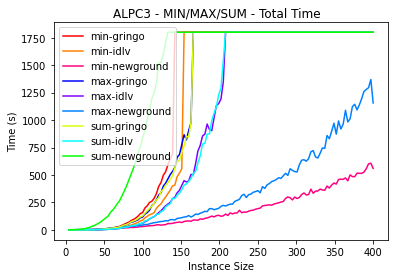

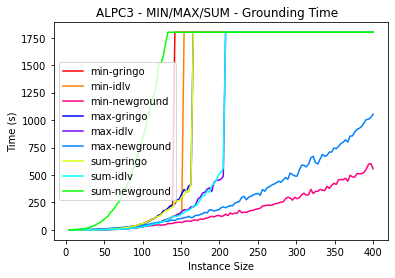

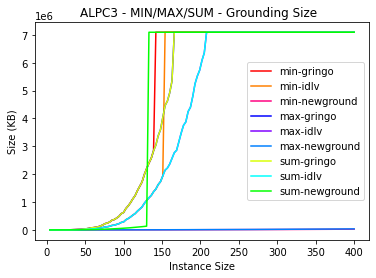

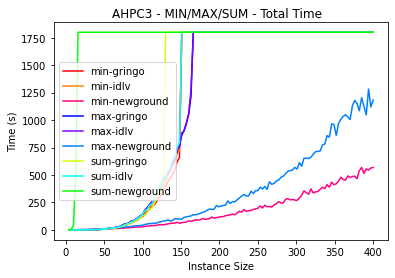

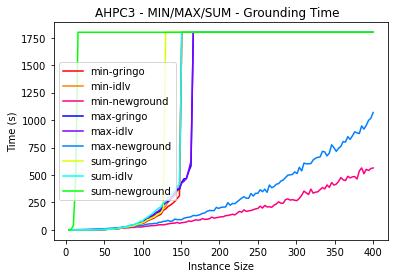

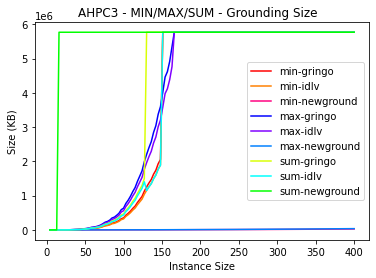

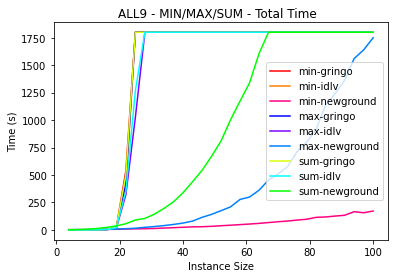

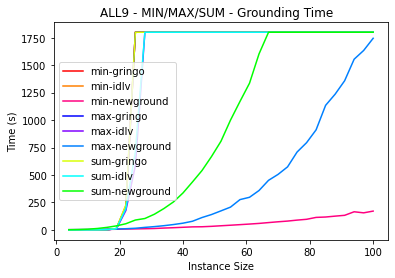

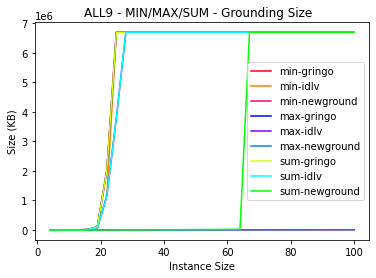

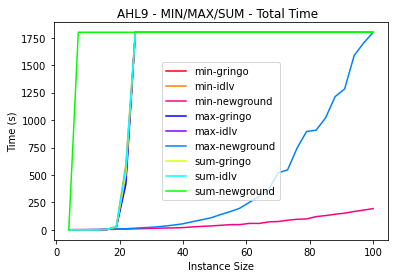

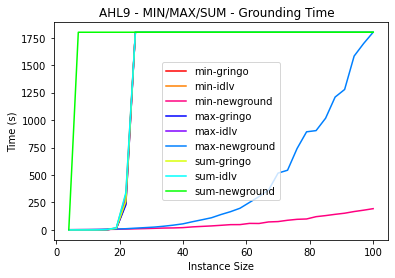

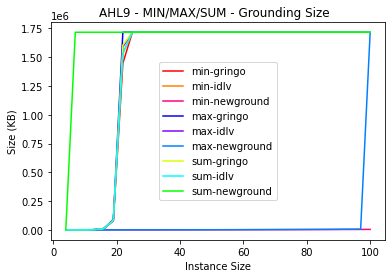

In [77]:
# MIN MAX SUM
problems = ["min","max","sum"]
cur_sub_problems = ["light-head-3","heavy-head-3","light-head-9","heavy-head-9"]
#cur_sub_problems = ["light-head-9","heavy-head-9"]


for sub_problem in cur_sub_problems:
    
    total_time_files = []
    grounding_time_files = []
    grounding_size_files = []
    
    for problem in problems:
        dir_ = problem_dir[problem]["sub_problems"][sub_problem]

        for strategy in strategies:
            files = dir_["strategies"][strategy]["file_names"]

            for file in files:
                if "total_time" in file:
                    total_time_files.append((problem,file))
                elif "grounding_time" in file:
                    grounding_time_files.append((problem,file))
                elif "grounding_size" in file:
                    grounding_size_files.append((problem,file))
                else: 
                    assert(False)
                
    total_time_files = list(set(total_time_files))
    grounding_time_files = list(set(grounding_time_files))
    grounding_size_files = list(set(grounding_size_files))
                
    plotting_code(total_time_files, "Total Time", "total_time", "Time (s)", mode = 1)
    plotting_code(grounding_time_files, "Grounding Time", "grounding_time", "Time (s)", mode = 1)
    plotting_code(grounding_size_files, "Grounding Size", "grounding_size", "Size (KB)", mode = 1)

In [42]:
sm_total_time_data = pandas.read_csv("25-stable-matching_total_time.csv", delimiter=',')
sm_grounding_time_data = pandas.read_csv("25-stable-matching_grounding_time.csv", delimiter=',')
sm_grounding_size_data = pandas.read_csv("25-stable-matching_grounding_size.csv", delimiter=',')

In [43]:
sm_total_time_data

,instance,gringo-duration,gringo-timeout-occured,idlv-duration,idlv-timeout-occured,newground-duration,newground-timeout-occured
0,instance_004.lp,0.027401,False,0.035653,False,1.539119,False
1,instance_007.lp,0.043041,False,0.038502,False,1.851004,False
2,instance_010.lp,0.102277,False,0.068759,False,2.326729,False
3,instance_013.lp,0.291730,False,0.147819,False,2.920885,False
4,instance_016.lp,0.722694,False,0.319852,False,3.859221,False
...,...,...,...,...,...,...,...
128,instance_388.lp,1800.000000,True,1800.000000,True,1800.000000,True
129,instance_391.lp,1800.000000,True,1800.000000,True,1800.000000,True
130,instance_394.lp,1800.000000,True,1800.000000,True,1800.000000,True
131,instance_397.lp,1800.000000,True,1800.000000,True,1800.000000,True


In [111]:
"""
x = list(bounds_total_time_data.instance)
total_time = list(bounds_total_time_data['newground-duration'])
grounding_time = list(bounds_grounding_time_data['newground-duration'])
grounding_size = list(bounds_grounding_size_data['newground-size'])

last_index = 0

for index in range(len(total_time)):
    item = total_time[index]
    if item > 1800:
        last_index = index + 1
"""

x = list(sm_total_time_data.instance)
new_x = []

for x_elem in x:
    new_x.append(int((x_elem.split("_")[1]).split(".")[0]))
    
x = new_x

    

newground_total_time = list(sm_total_time_data['newground-duration'])
newground_grounding_time = list(sm_grounding_time_data['newground-duration'])
newground_grounding_size = list(sm_grounding_size_data['newground-size'])


        



gringo_total_time = list(sm_total_time_data['gringo-duration'])
gringo_grounding_time = list(sm_grounding_time_data['gringo-duration'])
gringo_grounding_size = list(sm_grounding_size_data['gringo-size'])

new_gringo_total_time = []
for elem in gringo_total_time:
    if int(elem) > 1800:
        new_gringo_total_time.append(1800)
    else:
        new_gringo_total_time.append(elem)
gringo_total_time = new_gringo_total_time

new_gringo_grounding_time = []
for elem in gringo_grounding_time:
    if int(elem) > 1800:
        new_gringo_grounding_time.append(1800)
    else:
        new_gringo_grounding_time.append(elem)
gringo_grounding_time = new_gringo_grounding_time
        

idlv_total_time = list(sm_total_time_data['idlv-duration'])
idlv_grounding_time = list(sm_grounding_time_data['idlv-duration'])
idlv_grounding_size = list(sm_grounding_size_data['idlv-size'])

new_idlv_total_time = []
for elem in idlv_total_time:
    if int(elem) > 1800:
        new_idlv_total_time.append(1800)
    else:
        new_idlv_total_time.append(elem)
idlv_total_time = new_idlv_total_time

new_idlv_grounding_time = []
for elem in idlv_grounding_time:
    if int(elem) > 1800:
        new_idlv_grounding_time.append(1800)
    else:
        new_idlv_grounding_time.append(elem)
idlv_grounding_time = new_idlv_grounding_time



overall_max_grounding_size = 0
if max(newground_grounding_size) > overall_max_grounding_size:
    overall_max_grounding_size = max(newground_grounding_size)
if max(gringo_grounding_size) > overall_max_grounding_size:
    overall_max_grounding_size = max(gringo_grounding_size)
if max(idlv_grounding_size) > overall_max_grounding_size:
    overall_max_grounding_size = max(idlv_grounding_size)
    
for index in range(len(newground_total_time)):
    elem = newground_total_time[index]
    if int(elem) >= 1800:
        newground_grounding_size[index] = overall_max_grounding_size
for index in range(len(gringo_total_time)):
    elem = gringo_total_time[index]
    if int(elem) >= 1800:
        gringo_grounding_size[index] = overall_max_grounding_size
for index in range(len(idlv_total_time)):
    elem = idlv_total_time[index]
    if int(elem) >= 1800:
        idlv_grounding_size[index] = overall_max_grounding_size
        

In [112]:
last_index = 50

x = x[:last_index]
newground_total_time = newground_total_time[:last_index]
newground_grounding_time = newground_grounding_time[:last_index]
newground_grounding_size = newground_grounding_size[:last_index]

gringo_total_time = gringo_total_time[:last_index]
gringo_grounding_time = gringo_grounding_time[:last_index]
gringo_grounding_size = gringo_grounding_size[:last_index]

idlv_total_time = idlv_total_time[:last_index]
idlv_grounding_time = idlv_grounding_time[:last_index]
idlv_grounding_size = idlv_grounding_size[:last_index]


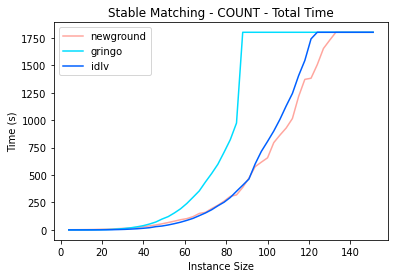

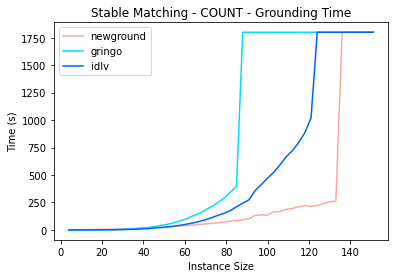

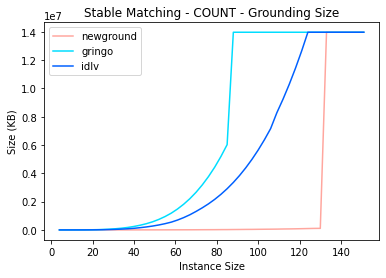

In [113]:
fig, ax = plt.subplots()

ax.plot(x, newground_total_time, label = "newground", color = color_no_body)
ax.plot(x, gringo_total_time, label = "gringo", color = color_gringo)
ax.plot(x, idlv_total_time, label = "idlv", color = color_idlv)

ax.set_xlabel("Instance Size")
ax.set_ylabel("Time (s)")
ax.legend()

ax.set_title(f"Stable Matching - COUNT - Total Time")

fig.savefig(f"images/sm_test_total_time_count.png", dpi=500)
plt.show()

fig, ax = plt.subplots()

ax.plot(x, newground_grounding_time, label = "newground", color = color_no_body)
ax.plot(x, gringo_grounding_time, label = "gringo", color = color_gringo)
ax.plot(x, idlv_grounding_time, label = "idlv", color = color_idlv)

ax.set_xlabel("Instance Size")
ax.set_ylabel("Time (s)")
ax.legend()

ax.set_title(f"Stable Matching - COUNT - Grounding Time")

fig.savefig(f"images/sm_test_grounding_time_count.png", dpi=500)
plt.show()

fig, ax = plt.subplots()

ax.plot(x, newground_grounding_size, label = "newground", color = color_no_body)
ax.plot(x, gringo_grounding_size, label = "gringo", color = color_gringo)
ax.plot(x, idlv_grounding_size, label = "idlv", color = color_idlv)

ax.set_xlabel("Instance Size")
ax.set_ylabel("Size (KB)")
ax.legend()

ax.set_title(f"Stable Matching - COUNT - Grounding Size")

fig.savefig(f"images/sm_test_grounding_size_count.png", dpi=500)
plt.show()

In [114]:
bounds_total_time_data = pandas.read_csv("26-bounds-test_total_time.csv", delimiter=',')
bounds_grounding_time_data = pandas.read_csv("26-bounds-test_grounding_time.csv", delimiter=',')
bounds_grounding_size_data = pandas.read_csv("26-bounds-test_grounding_size.csv", delimiter=',')

In [115]:
x = list(bounds_total_time_data.instance)
total_time = list(bounds_total_time_data['newground-duration'])
grounding_time = list(bounds_grounding_time_data['newground-duration'])
grounding_size = list(bounds_grounding_size_data['newground-size'])

In [116]:
last_index = 0

for index in range(len(total_time)):
    item = total_time[index]
    if item > 1800:
        last_index = index + 1
        
x = x[:last_index]
total_time = total_time[:last_index]
grounding_time = grounding_time[:last_index]
grounding_size = grounding_size[:last_index]
grounding_size[len(grounding_size) - 1] = max(grounding_size)
        

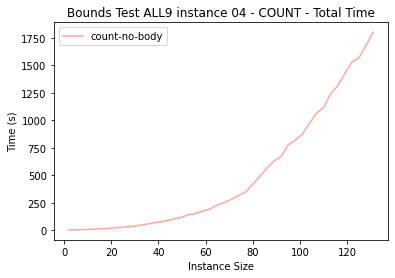

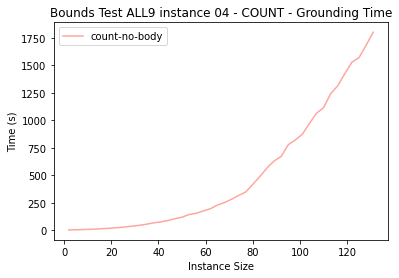

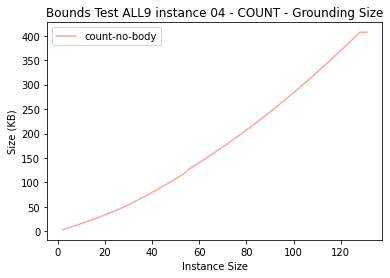

In [117]:
fig, ax = plt.subplots()

ax.plot(x, total_time, label = "count-no-body", color = color_no_body)
ax.set_xlabel("Instance Size")
ax.set_ylabel("Time (s)")
ax.legend()

ax.set_title(f"Bounds Test ALL9 instance 04 - COUNT - Total Time")

fig.savefig(f"images/bounds_test_total_time_count_ALL9_instance_04.png", dpi=500)
plt.show()

fig, ax = plt.subplots()

ax.plot(x, grounding_time, label = "count-no-body", color = color_no_body)
ax.set_xlabel("Instance Size")
ax.set_ylabel("Time (s)")
ax.legend()

ax.set_title(f"Bounds Test ALL9 instance 04 - COUNT - Grounding Time")

fig.savefig(f"images/bounds_test_grounding_time_count_ALL9_instance_04.png", dpi=500)
plt.show()

fig, ax = plt.subplots()

ax.plot(x, grounding_size, label = "count-no-body", color = color_no_body)
ax.set_xlabel("Instance Size")
ax.set_ylabel("Size (KB)")
ax.legend()

ax.set_title(f"Bounds Test ALL9 instance 04 - COUNT - Grounding Size")

fig.savefig(f"images/bounds_test_grounding_size_count_ALL9_instance_04.png", dpi=500)
plt.show()

In [10]:
# THE FOLLOWING CODE SNIPPET RENAMES 'rewrite-no-body' files to 'no-body'
"""
regex = re.compile('.*-rewrite-no-body-.*')

for root, dirs, files in os.walk(rootdir):
    for file in files:
        
        if regex.match(file):
            splits = str(file).split("rewrite-no-body")
            new_name = f"{splits[0]}no-body{splits[1]}"

            os.rename(str(file),new_name)
"""

'\nregex = re.compile(\'.*-rewrite-no-body-.*\')\n\nfor root, dirs, files in os.walk(rootdir):\n    for file in files:\n        \n        if regex.match(file):\n            splits = str(file).split("rewrite-no-body")\n            new_name = f"{splits[0]}no-body{splits[1]}"\n\n            os.rename(str(file),new_name)\n'

In [10]:
"""
regex = re.compile('.*21-sum-no-body-.*')

for root, dirs, files in os.walk(rootdir):
    for file in files:
        
        if regex.match(file):
            splits = str(file).split("no-body")
            new_name = f"{splits[0]}replace{splits[1]}"
            print(new_name)
            os.rename(str(file),new_name)
"""

21-sum-replace-clique-light-head-3_total_time.csv
21-sum-replace-clique-light-head-3_grounding_size.csv
21-sum-replace-clique-light-head-3_grounding_time.csv
